# Data Science Project -  Ishay Cohen & Noam Ramadi

## Project name :
### Songs' Popularity Factors
 
## Research Question  :
### Is it possible to predict a song popularity based on different factors such as artist, genre and more.

### Project planning :
   
   1) Defining a problem and identifying the research question. 
   
   2) Identify source for data aqquistion.
   
   3) Data aqquistion using Selenium + Beautiful Soup on the source we found.
   
   4) Preliminary analysis and data optimization.
   
   5) Data Cleansing. 
   
   6) EDA + Visualisation
   
   7) Machine learning - Comparing the accuracy of the differnet machine learning algorithms to answer our research question.
   
   8) Drawing conclusions.

In [1]:
 #=== CELL TYPE: IMPORTS AND SETUP 
import json
import bs4
from bs4 import BeautifulSoup  
import pandas as pd
import scipy as sc
import requests
from selenium import webdriver
import time
import re
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
import string
%matplotlib inline

# Our source is https://www.allmusic.com/

## Aqquire the data by scraping using Selenium and BeautifulSoup

In [55]:
def load_url_to_webdriver(url):
    from selenium.webdriver.chrome.options import Options
    from selenium import webdriver
    Options = Options()
    Options.headless = True
    webdriver = webdriver.Chrome(options=Options)
    webdriver.get(url)
    time.sleep(2)
    return webdriver

In [56]:
def load_soup_object(response):    
    soup1 = BeautifulSoup(response, "html.parser")
    return soup1

In [57]:
def filter_link_of_genres(soup_html):
    genre_list=soup_html.find_all("a",attrs={"class":"genre-image"})
    str_genre_list = str(genre_list)
    str_genre_list = str_genre_list.split()
    new=[]
    new1=[]
    for word in str_genre_list:
        if not "href" in word:
            str_genre_list.remove(word)

    for word in str_genre_list:    
        new.append(word[6:len(word)-6])     
    for word in new:
        if not "http" in word:
            new.remove(word)
    for word in new:
        if "http" in word:
            new1.append(word)    
    return new1  

In [ ]:
#Because the website is JS and not pure HTML we had to use selenium to read the data as HTML instead of JS
#selenium_webdriver hold the html page as Selenium object
#soup_html hold the html page as BeautifulSoup object

url = 'https://www.allmusic.com/genres'
selenium_webdriver=load_url_to_webdriver(url)
soup_html = load_soup_object(selenium_webdriver.page_source)
genre_list= filter_link_of_genres(soup_html)

In [ ]:
#Creating a list of urls of the artists in every genre
artists_in_genre_list=[]
for link in genre_list:
    artists_in_genre_list.append(link + '/artists')
for i in range(len(artists_in_genre_list)):
        print(artists_in_genre_list[i] ,i)  

In [ ]:
#Loading the url for research
artist_url_list=[]
for t in range (len(artists_in_genre_list)):
    url = artists_in_genre_list[t]
    selenium_webdriver=load_url_to_webdriver(url)
    soup_html = load_soup_object(selenium_webdriver.page_source)
    genre_list=soup_html.findAll("div",attrs={"class":"artist-highlight info-grid"}) 
    temp_list=[]
    temp_list=str(genre_list)
    temp_list=temp_list.split('"')
    for i in range (len(temp_list)):
        if '/artist/' in temp_list[i]:
            artist_url_to_add=temp_list[i]
            artist_url_list.append("https://www.allmusic.com" + artist_url_to_add + "/songs")
        

In [ ]:
#Data formatting
data={'song':[],'artist':[],'release_year':[],'composed':[],'genre':[],'appearances':[],'also_performed_by':[],'rating':[],}
df=pd.DataFrame(data)

# Creating a list of all the songs
    
    artist_highlights_songs_list - contain all songs

In [ ]:
artist_highlights_songs_list=[]
j=0
for artistIndex in artist_url_list:
    url=artistIndex
    selenium_webdriver=load_url_to_webdriver(url)
    soup_html = load_soup_object(selenium_webdriver.page_source)
    song_of_artist=soup_html.findAll("div",attrs={"class":"title"})
    for i in range(len(song_of_artist)):
        link_of_song=[t['href'] for t in song_of_artist[i].findAll("a")]
        if len(link_of_song) != 0:
            artist_highlights_songs_list.append(link_of_song[0])  

## In this section we will take each song from "artist_highlights_songs_list"
## identify and store each parameter into the data dictionary

In [ ]:
for song in artist_highlights_songs_list:
    url=song
    selenium_webdriver=load_url_to_webdriver(url)
    soup_html = load_soup_object(selenium_webdriver.page_source)
    url2=url+"/also-performed-by"
    selenium_webdriver2=load_url_to_webdriver(url2)
    soup_html2 = load_soup_object(selenium_webdriver2.page_source)
    performed_by_string=str(soup_html2.findAll("td",attrs={"class":"artist"}))
    song_name="None"
    artist_name="None"
    release_year=0
    genre_of_song="None"
    appearances_counter=0
    also_performed_by_counter=0
    rating= 0
    list_of_rates=[]

    if isinstance(soup_html.find("h2",attrs={"class":"song-artist"}),bs4.element.Tag):
        artist_name=soup_html.find("h2",attrs={"class":"song-artist"}).get_text()
    artist_name = artist_name.strip('\n')
    artist_name = artist_name.strip(' ')
    data['artist'].append(artist_name)

    if isinstance(soup_html.find("h1",attrs={"class":"song-title"}),bs4.element.Tag):
        song_name=soup_html.find("h1",attrs={"class":"song-title"}).get_text()
    song_name = song_name.strip('\n')
    song_name = song_name.strip(' ')
    data['song'].append(song_name)

    if isinstance(soup_html.find("p",attrs={"class":"song-release-year-text"}),bs4.element.Tag):
        release_year=soup_html.find("p",attrs={"class":"song-release-year-text"}).get_text()
    data['release_year'].append(release_year)
  
    if isinstance(soup_html.find("p",attrs={"class":"song-composer"}),bs4.element.Tag):
        composed_by=soup_html.find("p",attrs={"class":"song-composer"}).get_text()
    data['composed'].append(composed_by)
  
    if isinstance(soup_html.find("div",attrs={"class":"middle"}),bs4.element.Tag):
        genre_of_song=soup_html.find("div",attrs={"class":"middle"}).get_text()
        genre_of_song = genre_of_song.strip('\n')
        genre_of_song = genre_of_song.split(' ')
        genre_of_song= genre_of_song[0]
    data['genre'].append(genre_of_song)
  

    appearances=str(soup_html.findAll("td",attrs={"class":"cover"}))
    temp_list=appearances.split("td class=")
    for i in range (len(temp_list)):
        if 'cover' in temp_list[i]:
            appearances_counter=appearances_counter+1
    data['appearances'].append(appearances_counter)        
  
    also_performed_by_counter=soup_html2.find("section",attrs={"class":"performed_by"})
    also_performed_by_counter=soup_html2.find_all("td",attrs={"class":"artist"})
    also_performed_by_counter=len(also_performed_by_counter)
    data['also_performed_by'].append(also_performed_by_counter) 
   
    rating_str=str(soup_html.select("div[class*=allmusic-rating]"))
    rating_str=re.findall('\d+', rating_str)
    for x in rating_str:
        x=int(x)
    for rate in rating_str:
         if int(rate)>0 and int(rate)<11:
            rate=int(rate)+1
            list_of_rates.append(rate)
    if list_of_rates:
        rating_avg=sum(list_of_rates)/len(list_of_rates)/2
    else:
        rating_avg='None'
    data['rating'].append(rating_avg) 

### We don't want to accidently run this as it will overwrite our data.

In [ ]:
#df=pd.DataFrame(data)
#df.to_csv("all_songs.csv")

### Data aqquired.

# In the following chapter we will cleanse the data and then visualise it

## Loading the data we aqquired earlier

In [2]:
df = pd.read_csv("all_songs.csv", index_col=False)

In [3]:
df

,song,artist,release_year,composed,genre,appearances,also_performed_by,rating
0,ono,Dan the Automator,1996,Dan Nakamura,None,2,0,4
1,(Listen to The) Flower People,Spinal Tap,1984,Christopher Guest,Pop/Rock,1,100,4.575
2,Have Yourself a Merry Little Christmas,Judy Garland,1944,Ralph Blane,Jazz,140,1295,3.748717949
3,A Dying Cub Fan's Last Request,Steve Goodman,1984,Steve Goodman,Pop/Rock,3,200,4.5
4,"""A Place For My Stuff""",George Carlin,1981,George Carlin,None,1,0,4
...,...,...,...,...,...,...,...,...
7765,Zorba the Greek,Herb Alpert,1970,John Kander,Easy,4,3,4.25
7766,Zulu Laduma (Voices Like Thunder),Ladysmith Black Mambazo,2011,Russel Mthembu,None,1,0,3.5
7767,Zulu Laduma (Voices Like Thunder),Ladysmith Black Mambazo,2011,Russel Mthembu,None,1,0,3.5
7768,Zydeco Gris Gris,BeauSoleil / Michael Doucet,2009,Michael Doucet,None,1,0,3.5


### As you can see, the dataframe contains 62160 "squares" (7770*8)


# Data Cleansing 

### The rating column is type 'str'

### To use some functions we will have to convert the type of rating from string to float


In [4]:
#This function converts str to float
#We will use this function to cast rating into float so we can use the numeric functions on it later
def convert_str_to_float(df,column):
    numeric_rating = []
    for num in df[column]:
        numeric_rating.append(float(num))
    df2 = df.drop([column], axis=1)
    df2=df.assign(rating=numeric_rating)
    return df2

In [5]:
#This function converts str to float
#We will use this function to cast release_year into float so we can use the numeric functions on it later
def convert_str_to_float2(df,column):
    numeric_release_year = []
    for num in df[column]:
        numeric_release_year.append(float(num))
    df2 = df.drop([column], axis=1)
    df2=df.assign(release_year=numeric_release_year)
    return df2

In [6]:
#This function removes rows from the dataframe if they contain a 'NaN' value
def remove_rows_with_NaN(df):
    df = df.dropna(axis = 0)
    return df

In [7]:
#This function removes duplicated rows from the dataframe.
def remove_duplicated(df):
    df = df.drop_duplicates()
    return df

In [8]:
#Some songs have multiple artists, we will only show the MAIN artist
def fix_artist_name(df):
    for i in range(len(df.artist)):
        tempstr=df.artist[i].split('/')
        df.iloc[i,2]=tempstr[0]
    df =df.reset_index()
    del df["level_0"]
    del df["index"]
    return df

In [9]:
df.replace(to_replace=['None'], value=np.nan, inplace=True)
df.replace(to_replace=['Unknown'], value=np.nan, inplace=True)

#### Because some songs have no 'rating value' we will fill them with the average rating of the column

In [10]:
df = convert_str_to_float(df,"rating")
df.rating.fillna(df.rating.mean(),inplace=True)
df = convert_str_to_float2(df,"release_year")


In [11]:
df = remove_duplicated(df)
df = remove_rows_with_NaN(df)
df =df.reset_index()
df=fix_artist_name(df)
df

,song,artist,release_year,composed,genre,appearances,also_performed_by,rating
0,(Listen to The) Flower People,Spinal Tap,1984.0,Christopher Guest,Pop/Rock,1,100,4.575000
1,Have Yourself a Merry Little Christmas,Judy Garland,1944.0,Ralph Blane,Jazz,140,1295,3.748718
2,A Dying Cub Fan's Last Request,Steve Goodman,1984.0,Steve Goodman,Pop/Rock,3,200,4.500000
3,Silent Night,Vienna Boys' Choir,1930.0,Franz Gruber,Classical,8,0,1.900000
4,Amazing Grace,Judy Collins,1970.0,John Newton,Folk,18,0,2.200000
...,...,...,...,...,...,...,...,...
3437,Zing Zong,Kanda Bongo Man,1991.0,Kanda Bongo Man,International,4,0,2.875000
3438,Yoda,Weird Al Yankovic,1985.0,Ray Davies,Comedy/Spoken,6,0,1.900000
3439,Night and Day,Sergio Mendes,1970.0,Cole Porter,Pop/Rock,9,900,4.500000
3440,Zorba the Greek,Herb Alpert,1970.0,John Kander,Easy,4,3,4.250000


# Visualisation
### data plotting

In [12]:
#This function creates an ascending series of the most frequent elements in the given column
#We will use this function to prepare the data which we will later visualize
def get_frequent_elements(df, col_name, num_top_elements):
    most_freq = df[col_name].value_counts()[:num_top_elements]
    series = pd.Series(most_freq).sort_index(ascending=True)
    return series

## We chose to visualise the 11 most frequent genres in our data

In [13]:
sr_freq_genres = get_frequent_elements(df, 'genre', 11)

In [14]:
sr_freq_genres

Blues            241
Classical        273
Comedy/Spoken     99
Country          816
Easy             225
Electronic       176
Folk             363
International    196
Jazz              87
Pop/Rock         271
R&B               75
Name: genre, dtype: int64

In [15]:
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind = plot_type, ax=axis)

## Two types of data visualisation, pie and bar

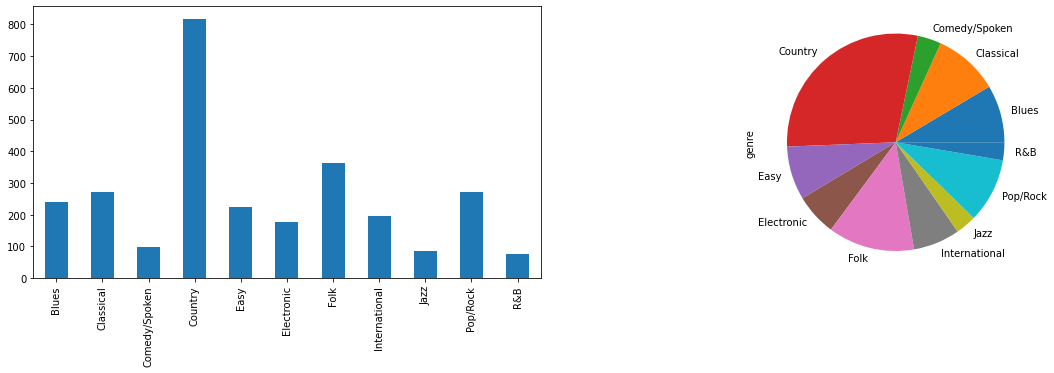

In [16]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
one_dim_plot(sr_freq_genres, 'pie', axes[1])
one_dim_plot(sr_freq_genres,'bar', axes[0])


In [17]:
#Create sub dataframe that contain the main genres
list_to_keep=[]
df2 = df.copy()
sr_freq_genres = get_frequent_elements(df, 'genre', 11)
for k, v in sr_freq_genres.items():
    list_to_keep.append(k)   

df2= df2[df2['genre'].isin(list_to_keep)]
df2 =df2.reset_index()          
del df2["index"]

In [18]:
df2

,song,artist,release_year,composed,genre,appearances,also_performed_by,rating
0,(Listen to The) Flower People,Spinal Tap,1984.0,Christopher Guest,Pop/Rock,1,100,4.575000
1,Have Yourself a Merry Little Christmas,Judy Garland,1944.0,Ralph Blane,Jazz,140,1295,3.748718
2,A Dying Cub Fan's Last Request,Steve Goodman,1984.0,Steve Goodman,Pop/Rock,3,200,4.500000
3,Silent Night,Vienna Boys' Choir,1930.0,Franz Gruber,Classical,8,0,1.900000
4,Amazing Grace,Judy Collins,1970.0,John Newton,Folk,18,0,2.200000
...,...,...,...,...,...,...,...,...
2817,Zing Zong,Kanda Bongo Man,1991.0,Kanda Bongo Man,International,4,0,2.875000
2818,Yoda,Weird Al Yankovic,1985.0,Ray Davies,Comedy/Spoken,6,0,1.900000
2819,Night and Day,Sergio Mendes,1970.0,Cole Porter,Pop/Rock,9,900,4.500000
2820,Zorba the Greek,Herb Alpert,1970.0,John Kander,Easy,4,3,4.250000


# Visualise the connection between Genre and it's Rating

<AxesSubplot:xlabel='genre'>

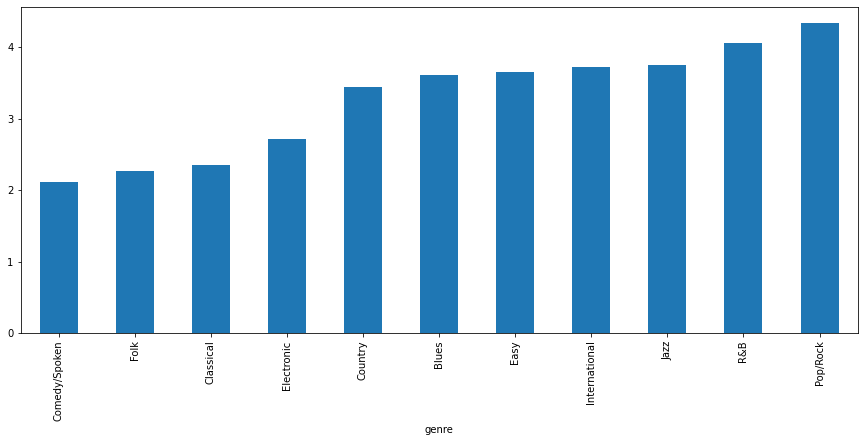

In [19]:
#We filter the 11 genres with the most songs, and sort them by their average rating
#then we visualise it
sr_avg=df2.groupby(['genre'])['rating'].mean()
plt.rcParams["figure.figsize"] = (15,6)
sr_avg=sr_avg.sort_values(ascending=True)
sr_avg.plot(kind='bar')

F:\Users\Ishay Cohen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='release_year'>

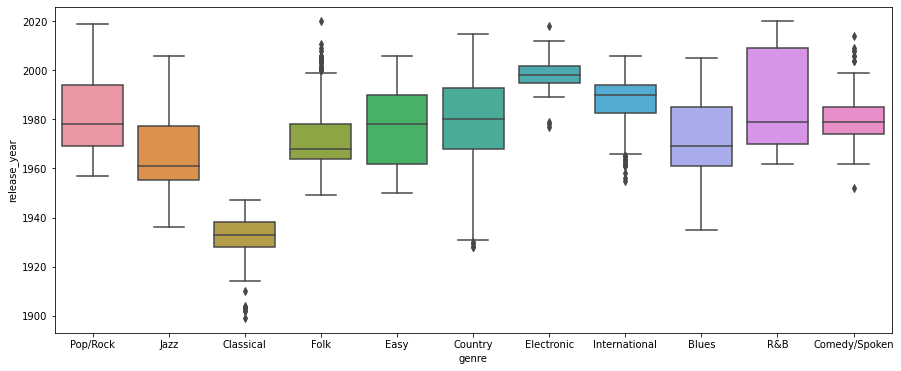

In [20]:
sns.boxplot(df2.genre,df2.release_year)

## Here we created a function that will get the average number of performers of each song and filter it by it's rating.

In [21]:
def average_of_covers(df , rate_below , rate_above):
    avg_covers_of_rate = 0
    count = 0
    _sum=0

    for i in range(len(df.rating)):
        if rate_above >= df.rating[i] and df.rating[i] >= rate_below :
            _sum = _sum + df.also_performed_by[i]
            count = count + 1
    avg_covers_of_rate = _sum/count
    return avg_covers_of_rate

## We will visualise it to show the connection between the number of performers to it's rating

Text(0, 0.5, 'rates')

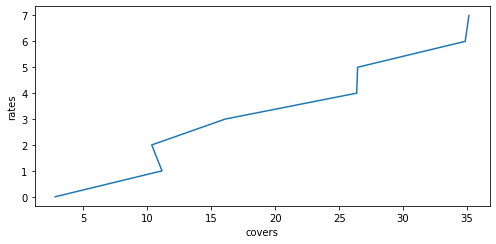

In [22]:
#Create list of average 'cover' of songs
list_covers=[]
list_rates=[0,1,2,3,4,5,6,7]

list_covers.append(average_of_covers(df,0,1))
list_covers.append(average_of_covers(df,1.5,2))
list_covers.append(average_of_covers(df,2,2.5))
list_covers.append(average_of_covers(df,2.5,3))
list_covers.append(average_of_covers(df,3,3.5))
list_covers.append(average_of_covers(df,3.5,4))
list_covers.append(average_of_covers(df,4,4.5))
list_covers.append(average_of_covers(df,4.5,5))
    

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(list_covers, list_rates)
plt.xlabel("covers")
plt.ylabel("rates")

# Machine Learning

### we will try to answer the research question - predict the rating of songs by different factors.

#### In order to answer this question 
#### we defined a successful song by it's rating.
#### if it is above 4, we will change it to '1', else '0'.

In [23]:
df2.rating.loc[df2["rating"]<4]=0
df2.rating.loc[df2["rating"]>=4]=1
df2

F:\Users\Ishay Cohen\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,song,artist,release_year,composed,genre,appearances,also_performed_by,rating
0,(Listen to The) Flower People,Spinal Tap,1984.0,Christopher Guest,Pop/Rock,1,100,1.0
1,Have Yourself a Merry Little Christmas,Judy Garland,1944.0,Ralph Blane,Jazz,140,1295,0.0
2,A Dying Cub Fan's Last Request,Steve Goodman,1984.0,Steve Goodman,Pop/Rock,3,200,1.0
3,Silent Night,Vienna Boys' Choir,1930.0,Franz Gruber,Classical,8,0,0.0
4,Amazing Grace,Judy Collins,1970.0,John Newton,Folk,18,0,0.0
...,...,...,...,...,...,...,...,...
2817,Zing Zong,Kanda Bongo Man,1991.0,Kanda Bongo Man,International,4,0,0.0
2818,Yoda,Weird Al Yankovic,1985.0,Ray Davies,Comedy/Spoken,6,0,0.0
2819,Night and Day,Sergio Mendes,1970.0,Cole Porter,Pop/Rock,9,900,1.0
2820,Zorba the Greek,Herb Alpert,1970.0,John Kander,Easy,4,3,1.0


# Classification

we encode every value to a numeric value

In [24]:
def transfer_str_to_numeric_vals(dataset):
    df_change = dataset.copy()
    df_change.dropna(inplace=True)
    df_change.drop_duplicates(inplace=True)
    return df_change.apply(lambda x:pd.factorize(x, sort=True)[0])

In [25]:
df2 = transfer_str_to_numeric_vals(df2)
df2

,song,artist,release_year,composed,genre,appearances,also_performed_by,rating
0,10,320,71,165,9,0,96,1
1,857,195,32,705,8,116,174,0
2,24,325,71,814,9,2,134,1
3,1900,364,18,293,1,7,0,0
4,118,194,57,473,6,17,0,0
...,...,...,...,...,...,...,...,...
2817,2582,198,78,509,7,3,0,0
2818,2535,374,72,718,2,5,0,0
2819,1549,313,57,175,9,8,172,1
2820,2583,148,57,463,4,3,3,1


### this function splits the data to x and y
### x represents the 'feature vectors', y represents the 'corresponding label' ('rating' column)
### then we split the data again to :
#### x_train,x_test
#### y_train,y_test

In [26]:
def split_to_train_and_test(dataset, label_column, test_ratio, rand_state):
    #split
    X= dataset.drop(columns=label_column)
    y = dataset[label_column]
    
    #train
    X_train , X_test = train_test_split(X,train_size=1-test_ratio ,random_state=rand_state)
    Y_train , Y_test = train_test_split(y, train_size= 1-test_ratio ,random_state=rand_state)
    return X_train, X_test, Y_train, Y_test

In [27]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'rating'
dataset = transfer_str_to_numeric_vals(df2) 
X_train, X_test, y_train, y_test = split_to_train_and_test(dataset, category_col_name, test_ratio, rand_state)

### this function returns the classifier object out of KNN,random forest, decision tree,svm and naive bayes.

In [28]:
def get_classifier_obj(classifier_name, params):
    ###
    if classifier_name == 'KNN':
        if params == None:
            clf = KNeighborsClassifier()
            return clf
        else:
            clf = KNeighborsClassifier(n_neighbors=params['n_neighbors'])
            return clf
        
        
    if classifier_name == 'random_forest':
        if params == None:
            return RandomForestClassifier()
        else:
            return RandomForestClassifier(n_estimators = params['n_estimators'])

    
    if classifier_name == 'decision_tree':
        if params == None:
            return tree.DecisionTreeClassifier()
        else:
            return tree.DecisionTreeClassifier(max_depth=params["max_depth"] ,
                                          min_samples_split=params["min_samples_split"])
        
        
    if classifier_name == 'naive_bayes':
        return GaussianNB()
            
    if classifier_name == 'svm':
        return SVC()
            

### This function calculates the evaluation metric of each test

In [30]:
def calc_evaluation_val(eval_metric, y_test, y_predicted):
  
    if eval_metric == "accuracy":
        return metrics.accuracy_score(y_test, y_predicted)
    
    elif eval_metric == "precision":
        return metrics.precision_score(y_test, y_predicted)
    
    elif eval_metric == "recall":
        return metrics.recall_score(y_test, y_predicted,average='micro')
    
    elif eval_metric == "f1":
        return metrics.f1_score(y_test, y_predicted)
    
    else : #confusion_matrix
        return confusion_matrix(y_test, y_predicted)
    

## This function will find the best 'k' for the KNN Algorithm and it's best score

In [32]:
def find_best_k_for_KNN(X_train, y_train):
    ###
    knn = KNeighborsClassifier()
    parameters = {'n_neighbors':[3,7,9,11] }
    clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    return clf.best_params_['n_neighbors'] , clf.best_score_


In [33]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'rating'
X_train, X_test, y_train, y_test = split_to_train_and_test(dataset, category_col_name, test_ratio, rand_state)
best_K, best_f1_KNN_params = find_best_k_for_KNN(X_train, y_train)


### This function will find the best decision tree and return it's accuracy value

In [34]:
def find_best_decision_tree_params(X_train, y_train):
    parameters = {'max_depth':[2,4,6],"min_samples_split":[5,10,20]}
    dtree = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dtree, parameters, scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_max_depth = clf.best_params_['max_depth']
    best_min_samples_split = clf.best_params_["min_samples_split"]
    best_f1_val = clf.best_score_
    return best_max_depth, best_min_samples_split, best_f1_val

In [35]:
X_train, X_test, y_train, y_test = split_to_train_and_test(dataset, category_col_name, test_ratio, rand_state)
best_max_dep, best_min_smpl_splt, best_f1_DT_params = find_best_decision_tree_params(X_train, y_train)


### This function will find the best random forest number estimator

In [36]:
def find_best_random_forest_num_estimators(X_train, y_train):
    parameters = {'n_estimators':[11,51,71]}
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, parameters, scoring=make_scorer(metrics.f1_score, greater_is_better=True))
    clf.fit(X_train, y_train)
    best_num_estimators = clf.best_params_['n_estimators']
    best_f1_val = clf.best_score_
    return best_num_estimators, best_f1_val


In [37]:
X_train, X_test, y_train, y_test = split_to_train_and_test(dataset, category_col_name, test_ratio, rand_state)
best_n_estimators, best_f1_RF_params = find_best_random_forest_num_estimators(X_train, y_train)



### This section will find the best model to use out of all the algorithms we showed earlier

In [38]:
def find_best_model(X_train, y_train, max_depth_val, min_samples_split_val):
    parameters = {'max_depth':max_depth_val,"min_samples_split":min_samples_split_val}
    best_clf = None
    best_recall_val = -1
    algos = ["svm","naive_bayes","decision_tree"]
    
    for alg in algos:
        clf = get_classifier_obj(alg,parameters)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        recall = calc_evaluation_val('recall',y_train,y_pred_train)
        print(clf, recall)
        if recall > best_recall_val:
            best_recall_val = recall
            best_clf = clf
    
    return best_clf, best_recall_val

In [39]:
test_ratio, rand_state = 0.2, 42
category_col_name = 'rating'
max_dep=4
min_smpl_splt=5
dataset
X_train, X_test, y_train, y_test = split_to_train_and_test(dataset, category_col_name, test_ratio, rand_state)
best_clf, best_recall_val=find_best_model(X_train, y_train, max_dep, min_smpl_splt)
print("KNN Accuracy: " , best_f1_KNN_params )
print("random forest Accuracy: " , best_f1_RF_params )

SVC() 0.7675896504766228
GaussianNB() 0.8370403994552883
DecisionTreeClassifier(max_depth=4, min_samples_split=5) 0.8697231048570132
KNN Accuracy:  0.31170326124383346
random forest Accuracy:  0.7156997806317857


In [40]:
print(best_clf, best_recall_val)

DecisionTreeClassifier(max_depth=4, min_samples_split=5) 0.8697231048570132


# Final Conclusions:
### 1) We visualised that there is infact a connection between the different factors of the song on the it's popularity.
### 2) Over the years, different music genre are rising.
### 3) The most popular genre across the years is Pop/Rock.
### 4) Using machine learning we determined the best model to use in our data - decision tree, it's accuracy is almost 87%.
### 5) We can roughly predict the popularity of a song using decision tree model.